In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
from scipy.stats import normaltest , shapiro ,anderson,chisquare ,kstest  

In [24]:
import pylab 
import scipy.stats as stats

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

Описание признаков с [сайта соревнования]( https://machinehack.com/hackathons/data_science_student_championship_south_zone/overview ) 
* 'Property_ID', = id строения
* 'room',  количество комнат
* 'layout_type'  =( 'BHK' 'RK' ) - тип планировки
* 'property_type'  =  ('Apartment' 'Studio Apartment' 'Independent Floor','Independent House' 'Villa' 'Penthouse' )
* 'locality',  = Overall Locality description
* 'area', = in Square Feet - площидь в квадратных футах
* 'furnish_type' = (  'Semi-Furnished' 'Furnished' 'Unfurnished') - тип мебелировки
* 'bathroom',: No. of Bathrooms - количество ванных
* 'city', : ('Ahmedabad' 'Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai' 'Pune') - город
* 'parking_spaces',: 1 or 0  : 1 = Yes, 0 = No - наличие парковки (Да \ нет)
* 'floor',: Floor from 0 to 20 - этаж
* 'pet_friendly', : 1 or 0  : 1 = Yes, 0 = No - можно ли заселиться с дом. животными (Да \ нет)
* 'power_backup', : 1 or 0  : 1 = Yes, 0 = No - наличие резервного электропитания (Да \ нет)
* 'washing_machine',: 1 or 0  : 1 = Yes, 0 = No - наличие стиральной машины (Да \ нет)
* 'air_conditioner', : 1 or 0  : 1 = Yes, 0 = No - наличие кондиционера (Да \ нет)
* 'geyser/solar',: 1 or 0  : 1 = Yes, 0 = No - наличие источника или солнечной панели (Да \ нет)
* 'security_deposit', Amount of security Deposit - Сумма залогового депозита
* 'neighborhood', : Nearest Metro/Bus/Mall in meters - расстояние до ближайшего метро или магазина в метрах
* 'CCTV/security' : CCTV available 1 or 0  : 1 = Yes, 0 = No - наличие видеонаблюдения (Да \ нет)
* 'lift': 1 or 0  : 1 = Yes, 0 = No - наличие лифта (Да \ нет)  
* 'price', = Rent in INR - ЦЕЛЕВАЯ ПЕРЕМЕННАЯ - стоимость аренды

 Из описания следует, что в наборе есть:
 * Бинарные признаки (9 шт)
     + lift
     + CCTV/security
     + geyser/solar
     + air_conditioner
     + washing_machine
     + power_backup
     + pet_friendly
     + parking_spaces
     + layout_type
 * Числовые признаки (3 шт)
     + area
     + security_deposit
     + neighborhood
 * Категориальные признаки (6 шт)
     + floor
     + furnish_type
     + room
     + bathroom
     + property_type
     + city
 
Признаки  floor , room и bathroom отнесены к категориям, поскольку имеют фиксированный набор значений.

Загрузка данных

In [3]:
train = pd.read_csv('train.csv' , sep = ',')
test = pd.read_csv('test.csv' , sep = ',')

In [4]:
Y = train['price']
train = train.drop(['price'] , axis =1).join(Y)

Первые 5 строк таблиц

In [67]:
train.head(5)

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
0,42208,3,BHK,Independent House,Palavakkam,1312,Furnished,2,Chennai,1,1,1,0,0,1,0,302616,0,0,300,33624
1,90879,1,BHK,Apartment,Manikonda,1474,Unfurnished,2,Hyderabad,0,17,0,1,0,0,1,19310,0,1,1600,9655
2,99943,3,BHK,Apartment,Jodhpur Park,1837,Semi-Furnished,2,Kolkata,0,10,1,1,1,1,0,118495,0,1,3100,23699
3,113926,1,BHK,Apartment,Chembur,606,Unfurnished,1,Mumbai,0,18,0,0,0,0,0,37836,0,1,300,6306
4,185438,1,BHK,Studio Apartment,Kalewadi Pandhapur Road,498,Semi-Furnished,3,Pune,0,14,0,0,1,1,0,72048,0,1,0,12008


In [23]:
test.head(5)

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
0,114342,2,BHK,Independent Floor,Palava,1347,Semi-Furnished,1,Mumbai,0,2,0,1,1,1,0,72624,1,0,900,NaN
1,88819,1,BHK,Independent House,Somajiguda,634,Semi-Furnished,3,Hyderabad,1,4,0,0,1,1,0,19656,0,0,2500,NaN
2,85623,1,BHK,Apartment,Toli Chowki,524,Unfurnished,1,Hyderabad,1,3,1,1,0,0,0,7500,0,0,3200,NaN
3,130856,3,BHK,Apartment,Thane West,1837,Unfurnished,5,Mumbai,1,9,1,0,0,0,1,137646,1,1,1200,NaN
4,40089,2,BHK,Apartment,Krishnarajapura,1208,Semi-Furnished,2,Bangalore,1,17,0,1,1,1,0,110898,0,1,1000,NaN


Информация о типе столбцов

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134683 entries, 0 to 134682
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Property_ID       134683 non-null  int64 
 1   room              134683 non-null  int64 
 2   layout_type       134683 non-null  object
 3   property_type     134683 non-null  object
 4   locality          134683 non-null  object
 5   area              134683 non-null  int64 
 6   furnish_type      134683 non-null  object
 7   bathroom          134683 non-null  int64 
 8   city              134683 non-null  object
 9   parking_spaces    134683 non-null  int64 
 10  floor             134683 non-null  int64 
 11  pet_friendly      134683 non-null  int64 
 12  power_backup      134683 non-null  int64 
 13  washing_machine   134683 non-null  int64 
 14  air_conditioner   134683 non-null  int64 
 15  geyser/solar      134683 non-null  int64 
 16  security_deposit  134683 non-null  int

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57722 entries, 0 to 57721
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Property_ID       57722 non-null  int64  
 1   room              57722 non-null  int64  
 2   layout_type       57722 non-null  object 
 3   property_type     57722 non-null  object 
 4   locality          57722 non-null  object 
 5   area              57722 non-null  int64  
 6   furnish_type      57722 non-null  object 
 7   bathroom          57722 non-null  int64  
 8   city              57722 non-null  object 
 9   parking_spaces    57722 non-null  int64  
 10  floor             57722 non-null  int64  
 11  pet_friendly      57722 non-null  int64  
 12  power_backup      57722 non-null  int64  
 13  washing_machine   57722 non-null  int64  
 14  air_conditioner   57722 non-null  int64  
 15  geyser/solar      57722 non-null  int64  
 16  security_deposit  57722 non-null  int64 

Проверка на содержание NULL и NA значений

In [69]:
train.isnull().sum()

Property_ID         0
room                0
layout_type         0
property_type       0
locality            0
area                0
furnish_type        0
bathroom            0
city                0
parking_spaces      0
floor               0
pet_friendly        0
power_backup        0
washing_machine     0
air_conditioner     0
geyser/solar        0
security_deposit    0
CCTV/security       0
lift                0
neighbourhood       0
price               0
dtype: int64

In [22]:
test.isnull().sum()

Property_ID             0
room                    0
layout_type             0
property_type           0
locality                0
area                    0
furnish_type            0
bathroom                0
city                    0
parking_spaces          0
floor                   0
pet_friendly            0
power_backup            0
washing_machine         0
air_conditioner         0
geyser/solar            0
security_deposit        0
CCTV/security           0
lift                    0
neighbourhood           0
price               57722
dtype: int64

Анализ состава категориальных столбцов в TRAIN и TEST

In [48]:
#функция для сопоставления количеств значений в train и test
#tr - набор train
#ts - набор test
#col - название столбца 

def table_train_test(tr , ts , col):
    tr_val_count = tr[col].value_counts()
    ts_val_count = ts[col].value_counts()
    tr_precent = np.round(tr[col].value_counts() / tr[col].value_counts().sum() , 3 )
    ts_precent = np.round(ts[col].value_counts() / ts[col].value_counts().sum() , 3 )
    percent_diff = np.abs(tr_precent - ts_precent)
    val_count = pd.concat( [tr_val_count , 
                            ts_val_count , 
                            tr_precent ,
                            ts_precent ,
                           percent_diff] , axis =1).fillna(0)
    val_count.columns = ['Train' , 'Test' ,'Train %' , 'Test %' , 'Разница %'  ]
    return val_count

In [50]:
#categor_cols = train.dtypes[ (train.dtypes !='int64') &  (train.dtypes.index !='locality')].index
categor_cols = train.columns.drop(['Property_ID','area','price' ,'security_deposit'])
 
for I in categor_cols:
    print('Признак  ',I)
    print(table_train_test(train, test , I ) )
    print('============================================')

Признак   room
   Train   Test  Train %  Test %  Разница %
1  47908  20532    0.356   0.356      0.000
2  43235  18391    0.321   0.319      0.002
3  36125  15560    0.268   0.270      0.002
4   6465   2841    0.048   0.049      0.001
5    950    398    0.007   0.007      0.000
Признак   layout_type
      Train   Test  Train %  Test %  Разница %
BHK  114684  49353    0.852   0.855      0.003
RK    19999   8369    0.148   0.145      0.003
Признак   property_type
                   Train   Test  Train %  Test %  Разница %
Apartment          86819  37272    0.645   0.646      0.001
Independent Floor  25850  10935    0.192   0.189      0.003
Independent House  13408   5765    0.100   0.100      0.000
Studio Apartment    5723   2524    0.042   0.044      0.002
Villa               2391   1010    0.018   0.017      0.001
Penthouse            492    216    0.004   0.004      0.000
Признак   locality
                                  Train    Test  Train %  Test %  Разница %
Thane West         

Из таблиц выше видно, что процентный состав значений переменных одинаков, что указывает на хорошее разделение на train и test

В наборе есть 2 колонки с большим количеством уникальных значений - Property_ID и locality. 

Проверка на пересечение множеств значений в train и test

In [65]:
 ( set( test['Property_ID']) ).issubset(set( train['Property_ID']) )

False

In [77]:
 ( set( test['locality']) ).issubset(set( train['locality']) )

False

Колонки Property_ID и locality не имеют общих значений  в train и test

Анализ числовых столбцов - Property_ID , area , neighborhood , price

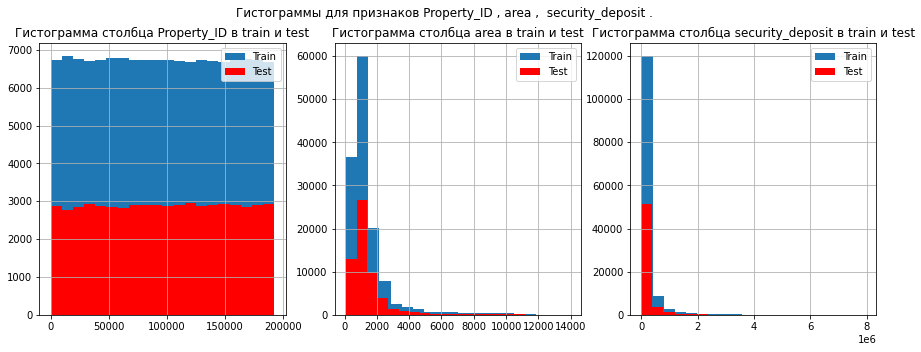

In [51]:
num_cols = ['Property_ID' , 'area' ,'security_deposit' ]
fig , ax = plt.subplots(  1,len(num_cols) , figsize=(15,5) )
fig.suptitle('Гистограммы для признаков Property_ID , area ,  security_deposit .')
 
for i in range( len(num_cols)):
    col = num_cols[i]
    ax[ i ].grid(True)
    ax[ i ].hist( train[col] ,  bins = 20)
    ax[ i ].hist( test[col] , color = 'red', bins = 20)
    ax[ i ].legend( ['Train','Test'])
    ax[ i ].set_title ( 'Гистограмма столбца '+col+' в train и test' ) 


Из гистограмм видно, что распределения признаков в Train и Test совпадают

Признаки  area ,  security_deposit сильно скошены влево.

Анализ столбца Price

Text(0.5, 1.0, 'Гистограмма столбца price в train')

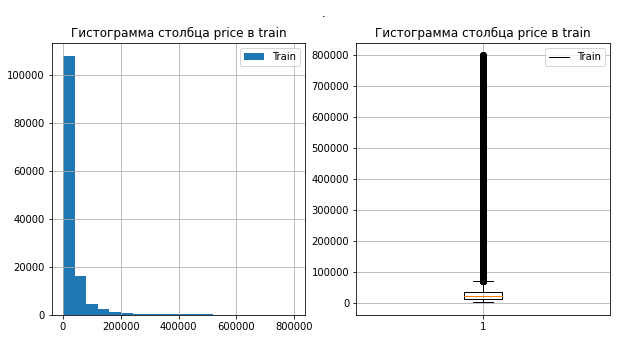

In [108]:
fig , ax = plt.subplots(  1,2 , figsize=(10,5) )
fig.suptitle(' .')
col = 'price'
 
ax[0].grid(True)
ax[0].hist( train[col] ,  bins = 20)
 
ax[0].legend( ['Train' ])
ax[0].set_title('Гистограмма столбца '+col+' в train')

 
ax[1].grid(True)
ax[1].boxplot( train[col]  )
 
ax[1].legend( ['Train' ])
ax[1].set_title('Гистограмма столбца '+col+' в train')

Из гистограммы видно, что цена сильно скошена влево.

Проверим, можно ли через алгебраические преобразования сделать распеределение колоколообразным.

Text(0.5, 1.0, 'Boxplot столбца price в train')

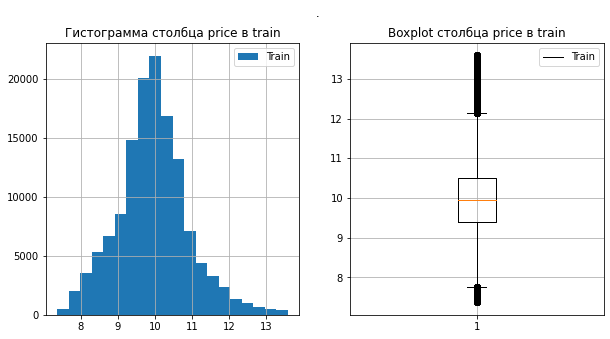

In [71]:
Y_edited  = np.log1p( train['price'])
fig , ax = plt.subplots(  1,2 , figsize=(10,5) )
fig.suptitle(' .')
col = 'price'
 
ax[0].grid(True)
ax[0].hist(Y_edited ,  bins = 20)
 
ax[0].legend( ['Train' ])
ax[0].set_title('Гистограмма столбца '+col+' в train')

 
ax[1].grid(True)
ax[1].boxplot( Y_edited  )
 
ax[1].legend( ['Train' ])
ax[1].set_title('Boxplot столбца '+col+' в train')

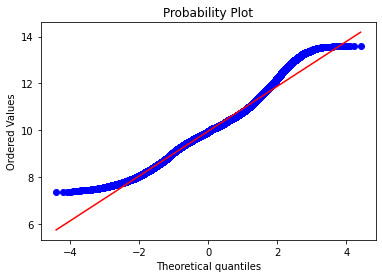

In [25]:
stats.probplot(np.log1p( train['price'] ), dist="norm", plot=pylab)
pylab.show()

Логарифмирование дало колоколообразное распределение. Но его хвосты отклоняются.

При помощи тестов нужно проверить его на нормальность

In [29]:
#  тест хи-квадрат
stat , pv = chisquare(np.log1p( train['price']))
if pv < 0.05:
    print('Pval = ',pv  ,' Распределение нормальное')
else:
    print('Pval = ',pv  ,' Распределение ненормальное')

Pval =  1.0  Распределение ненормальное


In [30]:
# тест Пирсона и Лиагостино
stat , pv =  normaltest(np.log1p( train['price']))
if pv < 0.05:
    print('Pval = ',pv  ,' Распределение нормальное')
else:
    print('Pval = ',pv  ,' Распределение ненормальное')

Pval =  0.0  Распределение нормальное


In [31]:
#тест Шапиро-Уилкса
stat , pv = shapiro(np.log1p( train['price']))
if pv < 0.05:
    print('Pval = ',pv  ,' Распределение нормальное')
else:
    print('Pval = ',pv  ,' Распределение ненормальное')

Pval =  0.0  Распределение нормальное


c:\users\gosha\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [36]:
# тест Колмогорова - Смирнова
stat , pv = kstest(np.log1p( train['price']), 'norm')
if pv < 0.05:
    print('Pval = ',pv  ,' Распределение нормальное')
else:
    print('Pval = ',pv  ,' Распределение ненормальное')

Pval =  0.0  Распределение нормальное


Большая часть тестов показала, что распределение нормальное.

Аналогично можно поступить с признаками  area ,  security_deposit. Слелать их распределения колоколообразными.

Text(0.5, 1.0, 'Boxplot столбца security_deposit в train')

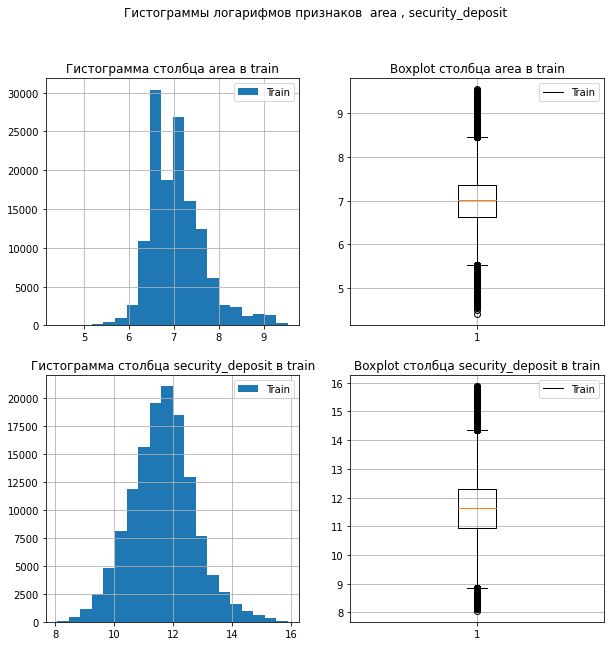

In [77]:
fig , ax = plt.subplots(  2,2 , figsize=(10,10) )
fig.suptitle('Гистограммы логарифмов признаков  area , security_deposit')
col = 'area'
 
ax[0][0].grid(True)
ax[0][0].hist(np.log1p( train[col] ) ,  bins = 20)
 
ax[0][0].legend( ['Train' ])
ax[0][0].set_title('Гистограмма столбца '+col+' в train')

 
ax[0][1].grid(True)
ax[0][1].boxplot( np.log1p( train[col] ) )
 
ax[0][1].legend( ['Train' ])
ax[0][1].set_title('Boxplot столбца '+col+' в train')
 
 

col = 'security_deposit'
 
ax[1][0].grid(True)
ax[1][0].hist(np.log1p( train[col] ) ,  bins = 20)
 
ax[1][0].legend( ['Train' ])
ax[1][0].set_title('Гистограмма столбца '+col+' в train')

 
ax[1][1].grid(True)
ax[1][1].boxplot( np.log1p( train[col] ) )
 
ax[1][1].legend( ['Train' ])
ax[1][1].set_title('Boxplot столбца '+col+' в train')
 

((array([-4.41092514, -4.21493941, -4.1084394 , ...,  4.1084394 ,
          4.21493941,  4.41092514]),
  array([4.40671925, 4.51085951, 4.55387689, ..., 9.51014862, 9.5277754 ,
         9.54273287])),
 (0.5937664959325853, 7.070571881417375, 0.9730104059284146))

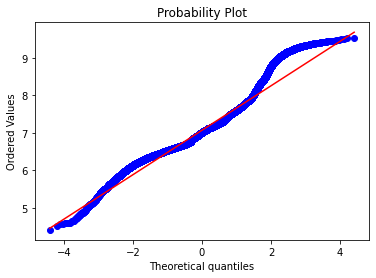

In [80]:
# QQ-plot для признака area 
stats.probplot(np.log1p( train[ 'area'] ), dist="norm", plot=pylab)
 

((array([-4.41092514, -4.21493941, -4.1084394 , ...,  4.1084394 ,
          4.21493941,  4.41092514]),
  array([ 8.06495089,  8.11102784,  8.12710919, ..., 15.8504124 ,
         15.86901371, 15.88752219])),
 (1.0856832503053808, 11.641156196218486, 0.9975382694699071))

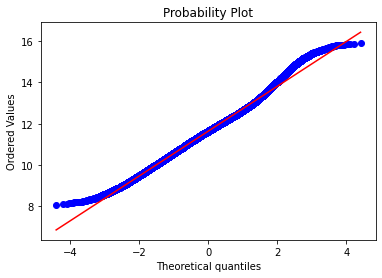

In [79]:
# QQ-plot для признака security_deposit
stats.probplot(np.log1p( train['security_deposit'] ), dist="norm", plot=pylab)

Проверим тестом Колмогорова-Смирнова нормальность распределений

In [83]:
col ='security_deposit'
print('Результат теста Колмогорова-Смирнова для признака '+col)
stat , pv = kstest(np.log1p( train[ col]), 'norm')
if pv < 0.05:
    print('Pval = ',pv  ,' Распределение нормальное')
else:
    print('Pval = ',pv  ,' Распределение ненормальное')
    
col ='area'
print('Результат теста Колмогорова-Смирнова для признака '+col)
stat , pv = kstest(np.log1p( train[ col ]), 'norm')
if pv < 0.05:
    print('Pval = ',pv  ,' Распределение нормальное')
else:
    print('Pval = ',pv  ,' Распределение ненормальное')

Результат теста Колмогорова-Смирнова для признака security_deposit
Pval =  0.0  Распределение нормальное
Результат теста Колмогорова-Смирнова для признака area
Pval =  0.0  Распределение нормальное


Резюме по набору данных.

Датасет имеет 17 категориальных признака и 2 числовых. Все числовые признаки и целевую переменную можно привести к нормальному распределнию путем логарифмирования. 
Есть столбец locality - из которого можно извлечь информацию об объекте (возможно гео-координаты)